## Observations and Insights 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df =pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice.

number_of_mice = mouse_df['Mouse ID'].nunique()

number_of_mice


249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.    

dup_mouse = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

dup_mouse
#dup_df = mouse_df.loc[:,['Mouse ID','Timepoint']]
#dup_df['Mouse ID'].count()


array(['g989'], dtype=object)

In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_mouse_df = mouse_df[mouse_df['Mouse ID'].isin(dup_mouse)==False]
new_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Checking the number of mice in the clean DataFrame.

new_mouse_df['Mouse ID'].nunique()




248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_df = new_mouse_df.groupby(['Drug Regimen'])

reg_mean = regimen_df['Tumor Volume (mm3)'].mean()
reg_mean

reg_median = regimen_df['Tumor Volume (mm3)'].median()

reg_median

reg_variance = regimen_df['Tumor Volume (mm3)'].var()

reg_variance

reg_std_dev = regimen_df['Tumor Volume (mm3)'].std()

reg_std_dev

reg_sem = regimen_df['Tumor Volume (mm3)'].sem()

reg_sem

reg_table_df = pd.DataFrame({'Tumor Vol(mean)':reg_mean,'Tumor Vol(median)':reg_median,'Tumor Vol(variance)':reg_variance,'Tumor Vol(std dev)':reg_std_dev,'Tumor Vol(sem)':reg_sem})

reg_table_df


# This method is the most straighforward, creating multiple series and putting them all together at the end.

#regimen_df['Tumor Volume (mm3)'].describe()



,Tumor Vol(mean),Tumor Vol(median),Tumor Vol(variance),Tumor Vol(std dev),Tumor Vol(sem)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


regimen_df['Tumor Volume (mm3)'].describe()



,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


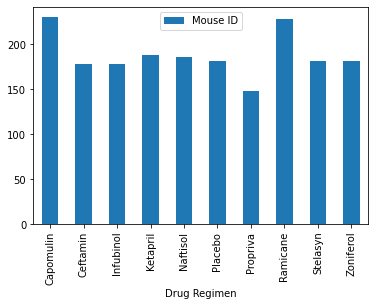

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#mouse_reg_count = regimen_df['Timepoint'].count()

mouse_reg_count = regimen_df['Mouse ID'].count()

mouse_reg_count_df = pd.DataFrame(mouse_reg_count)

mouse_reg_count_df

mouse_reg_count_df.plot.bar()





In [92]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mouse_reg_count_df)



plt.bar(x_axis,mouse_reg_count_df['Mouse ID'],color='b',alpha=0.5)
plt.xlim(-1, len(x_axis))
plt.ylim(0,max(mouse_reg_count_df['Mouse ID'])+20)
plt.title('Number of Mouse Tested Per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Tested')

plt.tight_layout()



SyntaxError: invalid syntax (<ipython-input-92-abe2ec61c755>, line 7)

In [59]:
mouse_reg_count_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,160
Ramicane,228
Stelasyn,181


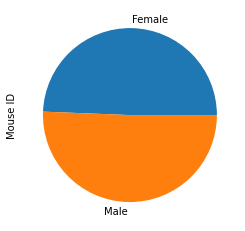

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = new_mouse_df.groupby(['Sex'])

gender_df_count = gender_df['Mouse ID'].count()

gender_df_count.plot.pie(y='Mouse ID')



In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_df_count,autopct="%1.1f%%",labels= shadow=True, startangle=140)



SyntaxError: invalid syntax (<ipython-input-10-4408130baa48>, line 3)

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

vol_df = new_mouse_df.groupby('Mouse ID')

last_tim = vol_df['Timepoint'].max()

last_tim_df = pd.DataFrame(last_tim)

last_tim_df

last_tim = last_tim.reset_index()
max_vol_df = last_tim.merge(new_mouse_df,on=['Mouse ID','Timepoint'],how="left")

#max_vol_df = pd.merge(new_mouse_df,last_tim_df,on='Mouse ID')

max_vol_df



#for row in max_vol_df:
# if max_vol_df['Drug Regimen']=='Capomulin' and max_vol_df['Timepoint_x']==max_vol_df['Timepoint_y']:
       # cap_vol.append['Tumor Volume (mm3)']
#cap_vol

#cap_max_vol_df = max_vol_df.loc[(max_vol_df['Drug Regimen']=='Capomulin') & (max_vol_df['Timepoint_x']==max_vol_df['Timepoint_y'])][['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#cap_max_vol_df

#ram_max_vol_df = max_vol_df.loc[(max_vol_df['Drug Regimen']=='Ramicane') & (max_vol_df['Timepoint_x']==max_vol_df['Timepoint_y'])][['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#ram_max_vol_df


#inf_max_vol_df = max_vol_df.loc[(max_vol_df['Drug Regimen']=='Infubinol') & (max_vol_df['Timepoint_x']==max_vol_df['Timepoint_y'])][['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#inf_max_vol_df


#cef_max_vol_df = max_vol_df.loc[(max_vol_df['Drug Regimen']=='Ceftamin') & (max_vol_df['Timepoint_x']==max_vol_df['Timepoint_y'])][['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#cef_max_vol_df


#reg_max_vol_df = pd.concat([cap_max_vol_df, ram_max_vol_df, inf_max_vol_df, cef_max_vol_df])

#reg_max_vol_df

#reg_max_vol_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [110]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']




# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treatment_df = reg_max_vol_df.groupby('Drug Regimen')

q1 = treatment_df['Tumor Volume (mm3)'].quantile(0.25)

q3 = treatment_df['Tumor Volume (mm3)'].quantile(0.75)

iqr = q3 - q1

outliers_test = iqr*1.5

outliers_test

upper_bound = q3 + iqr

lower_bound = q1 -iqr

#outlier_df = treatment_df.loc[(treatment_df['Tumor Volume (mm3)']< lower_bound) & (treatment_df['Tumor Volume (mm3)']>upper_bound)]

#outlier_df

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
        final_tumor_vol = max_vol_df.loc[max_vol_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']


        quartiles = final_tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)



    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
        outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

        print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


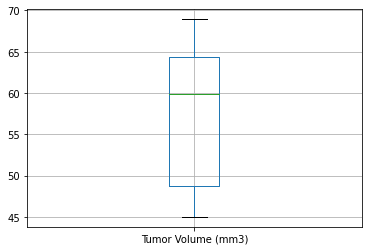

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_vol_df = pd.DataFrame(final_tumor_vol)

final_tumor_vol_df.boxplot()


## Line and Scatter Plots

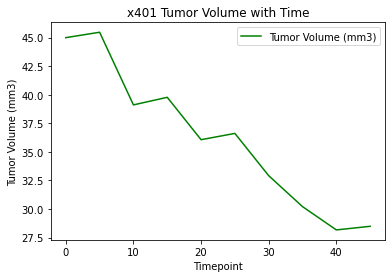

In [113]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cam_mouse = new_mouse_df.loc[new_mouse_df['Drug Regimen']=='Capomulin']

cam_mouse_df = cam_mouse.set_index('Mouse ID')

mouse_id = input('which mouse treatment path woul you want to look at?')

tumor_vol_over_time =cam_mouse_df.loc[mouse_id,['Tumor Volume (mm3)']]

mouse_timepoint = cam_mouse_df.loc[mouse_id,['Timepoint']]

plt.plot(mouse_timepoint,tumor_vol_over_time, color='g',label='Tumor Volume (mm3)')

plt.legend(loc='best')

plt.title(mouse_id + ' Capomulin Tumor Volume with Time')

plt.xlabel('Timepoint')

plt.ylabel('Tumor Volume (mm3)')

plt.show()


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Mouse_tumor_vol = cam_mouse.groupby(['Mouse ID'])

ave_tum_vol = Mouse_tumor_vol['Tumor Volume (mm3)'].mean()

ave_tum_vol

mouse_weight = cam_mouse['Weight (g)']

plt.scarter(mouse_weight,ave_tum_vol,marker=0, facecolors='r',edgecolors='black')




## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
